# PCA - Principal Component Analysis
## Face recognition task
https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

In [106]:
import matplotlib

%matplotlib inline
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import torch
from torch.nn.functional import conv2d
from PIL import Image
import numpy as np
from torchvision.transforms import ToTensor
from tqdm import tqdm
import os
import pickle
from os import path
from tempfile import TemporaryFile

In [107]:
folder = path.expanduser('faces94/female')

100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 458.72it/s]


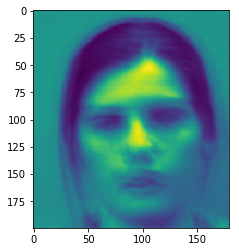

In [108]:
ekavaz_folder = path.join(folder, 'ekavaz')
ekavaz_img = [f for f in os.listdir(ekavaz_folder) if f.endswith('.jpg')]

ekavaz = np.zeros((len(ekavaz_img),200, 180))
ekavaz_norm = np.zeros((len(ekavaz_img),200, 180))
sum_ekavaz = np.zeros((200, 180))
ekavaz_matrix = np.zeros((len(ekavaz_img), 36000))

i=0

for t in tqdm(np.sort(ekavaz_img)):
    

    ekavaz[i] = np.array(Image.open(path.join(ekavaz_folder, t)).convert('L'))
    sum_ekavaz += ekavaz[i]
    
    i+=1
    
average_ekavaz = sum_ekavaz/i

plt.imshow(average_ekavaz)

100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 609.71it/s]


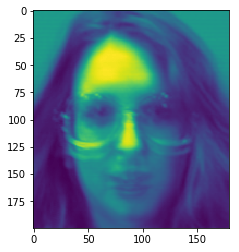

In [109]:
elduns_folder = path.join(folder, 'elduns')
elduns_img = [f for f in os.listdir(elduns_folder) if f.endswith('.jpg')]

elduns = np.zeros((len(elduns_img),200, 180))
elduns_norm = np.zeros((len(elduns_img),200, 180))
sum_elduns = np.zeros((200, 180))
elduns_matrix = np.zeros((len(elduns_img), 36000))

i=0

for t in tqdm(np.sort(elduns_img)):
    

    elduns[i] = np.array(Image.open(path.join(elduns_folder, t)).convert('L'))
    sum_elduns += elduns[i]
    
    i+=1
    
average_elduns = sum_elduns/i

plt.imshow(average_elduns)

100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 575.30it/s]


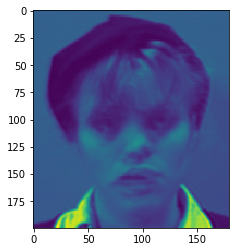

In [110]:
drbost_folder = path.join(folder, 'drbost')
drbost_img = [f for f in os.listdir(drbost_folder) if f.endswith('.jpg')]

drbost = np.zeros((len(drbost_img),200, 180))
drbost_norm = np.zeros((len(drbost_img),200, 180))
sum_drbost = np.zeros((200, 180))
drbost_matrix = np.zeros((len(drbost_img), 36000))

i=0

for t in tqdm(np.sort(drbost_img)):
    

    drbost[i] = np.array(Image.open(path.join(drbost_folder, t)).convert('L'))
    sum_drbost += drbost[i]
    
    i+=1
    
average_drbost = sum_drbost/i

plt.imshow(average_drbost)

100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 453.23it/s]


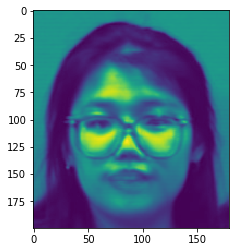

In [111]:
yfhsie_folder = path.join(folder, 'yfhsie')
yfhsie_img = [f for f in os.listdir(yfhsie_folder) if f.endswith('.jpg')]

yfhsie = np.zeros((len(yfhsie_img),200, 180))
yfhsie_norm = np.zeros((len(yfhsie_img),200, 180))
sum_yfhsie = np.zeros((200, 180))
yfhsie_matrix = np.zeros((len(yfhsie_img), 36000))

i=0

for t in tqdm(np.sort(yfhsie_img)):
    

    yfhsie[i] = np.array(Image.open(path.join(yfhsie_folder, t)).convert('L'))
    sum_yfhsie += yfhsie[i]
    
    i+=1
    
average_yfhsie = sum_yfhsie/i

plt.imshow(average_yfhsie)

100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 587.51it/s]


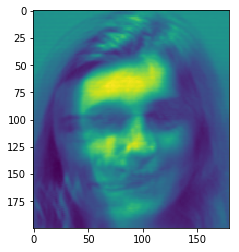

In [112]:
slbirc_folder = path.join(folder, 'slbirc')
slbirc_img = [f for f in os.listdir(slbirc_folder) if f.endswith('.jpg')]

slbirc = np.zeros((len(slbirc_img),200, 180))
slbirc_norm = np.zeros((len(slbirc_img),200, 180))
sum_slbirc = np.zeros((200, 180))
slbirc_matrix = np.zeros((len(slbirc_img), 36000))

i=0

for t in tqdm(np.sort(slbirc_img)):
    

    slbirc[i] = np.array(Image.open(path.join(slbirc_folder, t)).convert('L'))
    sum_slbirc += slbirc[i]
    
    i+=1
    
average_slbirc = sum_slbirc/i

plt.imshow(average_slbirc)

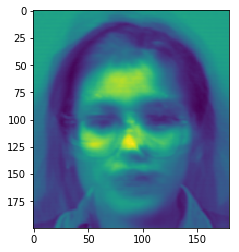

In [113]:
average_face = (average_ekavaz +\
average_elduns +\
average_drbost +\
average_yfhsie +\
average_slbirc)/5

plt.imshow(average_face)
#average_face=average_face.flatten()

In [114]:
for i in range(len(ekavaz_img)):
    ekavaz_norm[i] = ekavaz[i] - average_face
    ekavaz_matrix[i] = ekavaz_norm[i].flatten()
    
    elduns_norm[i] = elduns[i] - average_face
    elduns_matrix[i] = elduns[i].flatten()
    
    drbost_norm[i] = drbost[i] - average_face
    drbost_matrix[i] = drbost[i].flatten()
    
    yfhsie_norm[i] = yfhsie[i] - average_face
    yfhsie_matrix[i] = yfhsie[i].flatten()
    
    slbirc_norm[i] = slbirc[i] - average_face
    slbirc_matrix[i] = slbirc[i].flatten()

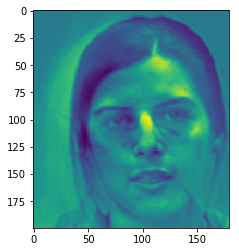

In [136]:
plt.imshow(ekavaz_norm[3])

X.shape: (100, 36000)
torch.Size([100, 100])
torch.Size([100])
V.shape: torch.Size([100, 36000])
(100, 100)
(100, 2)


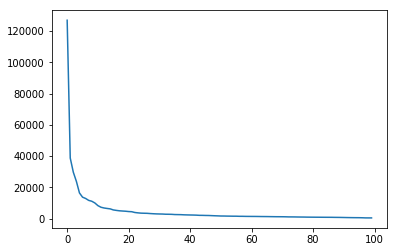

In [137]:
X = np.vstack((ekavaz_matrix, elduns_matrix, drbost_matrix, yfhsie_matrix, slbirc_matrix))
print("X.shape:", X.shape)
X = np.transpose(X)
k = 2
X = torch.from_numpy(X)

U,S,V = torch.svd(torch.t(X)) #U...eigenvectors V...projection
print(U.shape)
print(S.shape)
V=np.transpose(V)
print("V.shape:", V.shape)
s = np.diag(S)
#s = torch.from_numpy(s)
print(s.shape)
C=np.dot(U[:, 0:k],s[0:k, 0:k])
#C = U[:, 0:k].dot(s[0:k, 0:k])

#C = torch.mm(X, V[:,:k])        #Principal Components
#C = torch.mm(X, U[:,:k])       #20th best eigenvectors
#C = np.transpose(C)
print(C.shape)

plt.plot(np.array(S))

#X_new = C.dot(V)

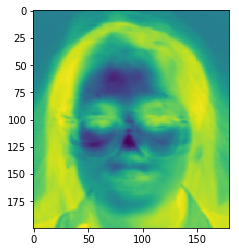

In [140]:
imshow(np.reshape(V[0], (200, 180)))

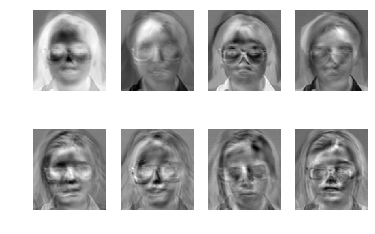

In [141]:
fig, ((ax_0, ax_1, ax_2, ax_3), (ax_4, ax_5, ax_6, ax_7)) = plt.subplots(2,4)
ax_0.imshow(np.reshape(V[0], (200, 180)), cmap='gray')
ax_0.set_axis_off() 
ax_1.imshow(np.reshape(V[1], (200, 180)), cmap='gray')
ax_1.set_axis_off() 
ax_2.imshow(np.reshape(V[2], (200, 180)), cmap='gray')
ax_2.set_axis_off() 
ax_3.imshow(np.reshape(V[3], (200, 180)), cmap='gray')
ax_3.set_axis_off() 
ax_4.imshow(np.reshape(V[4], (200, 180)), cmap='gray')
ax_4.set_axis_off() 
ax_5.imshow(np.reshape(V[5], (200, 180)), cmap='gray')
ax_5.set_axis_off() 
ax_6.imshow(np.reshape(V[6], (200, 180)), cmap='gray')
ax_6.set_axis_off() 
ax_7.imshow(np.reshape(V[7], (200, 180)), cmap='gray')
ax_7.set_axis_off() 

(100, 36000)


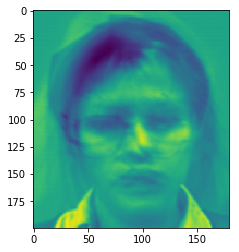

In [143]:
X_new = C.dot(V[:k,:])
print(X_new.shape)
plt.imshow(torch.from_numpy(np.reshape(X_new[2], (200, 180))))

# Reconstruction of a new face

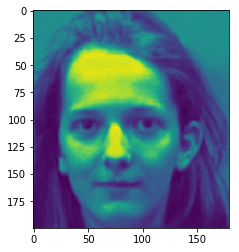

In [149]:
klclar = np.array(Image.open('faces94/female/klclar/klclar.1.jpg').convert('L'))
klclar = np.array(klclar, dtype='double')

plt.imshow(klclar)

(1, 2)


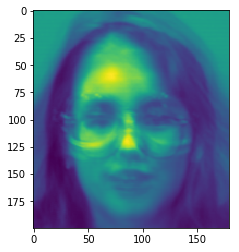

In [153]:
if isinstance(klclar, np.ndarray):
    klclar=klclar.flatten()
    klclar= torch.from_numpy(klclar)
    klclar=klclar.unsqueeze(0)
    
if klclar.shape == (1, 36000):
    klclar = np.transpose(klclar)
    
projection_klclar = torch.mm(V[:k, :], klclar)
projection_klclar = np.transpose(projection_klclar)
projection_klclar = np.array(projection_klclar)
print(projection_klclar.shape)

klclar_new = projection_klclar.dot(V[:k,:])
plt.imshow(torch.from_numpy(np.reshape(klclar_new, (200, 180))))